<a href="https://colab.research.google.com/github/Aadityasindhuu/Aadityasindhuu/blob/main/Title_Emotion_Detection_through_Facial_Expressions_and_Speech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

uploaded = files.upload()



Saving audio.zip to audio.zip


In [2]:
import zipfile

zip_path = 'audio.zip'  # or whatever name you uploaded
extract_path = '/content/ravdess'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted to:", extract_path)



Extracted to: /content/ravdess


In [ ]:
"C:\Users\HP\Downloads\audio.zip"

In [3]:
import os

# Print some files to verify
for root, dirs, files in os.walk(extract_path):
    for file in files[:5]:
        print(os.path.join(root, file))
    break


In [4]:
!pip install librosa --quiet

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import os


In [5]:
def extract_mfcc(file_path, n_mfcc=40, max_pad_len=174):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')  # Load audio
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)

        # Padding or truncating to ensure consistent shape
        if mfcc.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]

        return mfcc
    except Exception as e:
        print("Error encountered while parsing file:", file_path)
        return None


In [6]:
import os

print("Contents of /content:")
print(os.listdir("/content"))


Contents of /content:
['.config', 'audio.zip', 'ravdess', 'sample_data']


In [29]:
import os
import numpy as np
import librosa
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam


In [8]:
!pip install resampy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.9 MB/s eta 0:00:00


In [9]:
import librosa
import numpy as np

def extract_mfcc(file_path, max_pad_len=174):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)

        # Padding if shorter than max_pad_len
        if mfcc.shape[1] < max_pad_len:
            pad_width = max_pad_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_pad_len]

        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


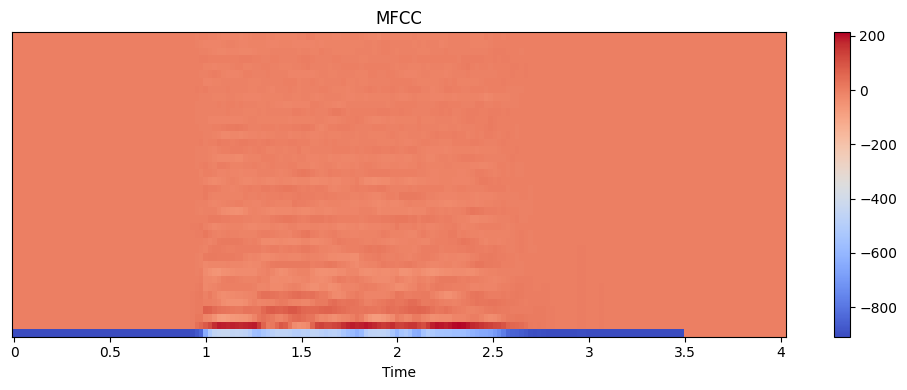

In [10]:
# Replace with the actual path of an audio file inside your extracted folder
sample_file = "/content/ravdess/Actor_01/03-01-04-01-02-01-01.wav"



# Extract MFCC
mfcc = extract_mfcc(sample_file)

# Plot it
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [11]:
import os
import numpy as np

def get_emotion_label(file_name):
    # Example: '03-01-04-01-02-01-01.wav'
    emotion_code = int(file_name.split("-")[2])
    emotion_map = {
        1: "neutral", 2: "calm", 3: "happy", 4: "sad",
        5: "angry", 6: "fearful", 7: "disgust", 8: "surprised"
    }
    return emotion_map.get(emotion_code, "unknown")

def extract_features_from_directory(directory):
    features = []
    labels = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".wav"):
                file_path = os.path.join(root, file)
                mfcc = extract_mfcc(file_path)
                if mfcc is not None:
                    features.append(np.mean(mfcc.T, axis=0))  # Averaged MFCCs
                    labels.append(get_emotion_label(file))
    return np.array(features), np.array(labels)


In [12]:
audio_dir = "/content/ravdess"
X_audio, y_audio = extract_features_from_directory(audio_dir)
print(f"Extracted {len(X_audio)} audio samples.")


Extracted 2880 audio samples.


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y_audio)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_audio, y_encoded, test_size=0.2, random_state=42)


In [14]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

       angry       0.60      0.76      0.67        82
        calm       0.60      0.73      0.66        74
     disgust       0.61      0.57      0.59        74
     fearful       0.64      0.60      0.62        82
       happy       0.60      0.52      0.56        86
     neutral       0.50      0.58      0.54        26
         sad       0.55      0.49      0.52        82
   surprised       0.64      0.53      0.58        70

    accuracy                           0.60       576
   macro avg       0.59      0.60      0.59       576
weighted avg       0.60      0.60      0.59       576



In [30]:
def extract_mfcc(file_path, max_len=173):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        if mfcc.shape[1] < max_len:
            pad_width = max_len - mfcc.shape[1]
            mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc = mfcc[:, :max_len]
        return mfcc
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None


In [37]:
data = []
labels = []

emotions_map = {
    '01': 'neutral',
    '02': 'calm',
    '03': 'happy',
    '04': 'sad',
    '05': 'angry',
    '06': 'fearful',
    '07': 'disgust',
    '08': 'surprised'
}

for root, dirs, files in os.walk('/content/ravdess'):
    for file in files:
        if file.endswith('.wav'):
            emotion = emotions_map[file.split('-')[2]]
            file_path = os.path.join(root, file)
            mfcc = extract_mfcc(file_path)
            if mfcc is not None:
                data.append(mfcc)
                labels.append(emotion)


In [38]:
X = np.array(data)
X = X.reshape(X.shape[0], 40, 173, 1)

le = LabelEncoder()
y = to_categorical(le.fit_transform(labels))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, LSTM, TimeDistributed, Reshape
from tensorflow.keras.optimizers import Adam

input_shape = (40, 173, 1)  # Example MFCC shape after padding/truncation

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(8, activation='softmax'))  # 7 emotion classes

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Save model
model.save('/content/audio_model.h5')

Epoch 1/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.1404 - loss: 26.8957 - val_accuracy: 0.1771 - val_loss: 2.0657
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1444 - loss: 2.0636 - val_accuracy: 0.2066 - val_loss: 2.0429
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1897 - loss: 2.0351 - val_accuracy: 0.2031 - val_loss: 2.0181
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.1958 - loss: 2.0218 - val_accuracy: 0.2622 - val_loss: 1.9257
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2211 - loss: 1.9545 - val_accuracy: 0.3056 - val_loss: 1.7498
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2895 - loss: 1.8470 - val_accuracy: 0.3733 - val_loss: 1.7469
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3084 - loss: 1.7896 - val_accuracy: 0.3733 - val_loss: 1.6379
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3314 - loss: 1.7144 - val_accuracy: 0.3924 - val_los

In [35]:
import numpy as np

unique_labels = np.unique(labels)
print(f"Unique emotion labels: {unique_labels}")
print(f"Total unique classes: {len(unique_labels)}")


Unique emotion labels: ['angry' 'calm' 'disgust' 'fearful' 'happy' 'neutral' 'sad' 'surprised']
Total unique classes: 8


In [15]:
from google.colab import files
import zipfile
import os

# Upload your dataset
uploaded = files.upload()

# Assuming it's a zip file like "facial_data.zip"
zip_path = next(iter(uploaded))
extract_path = "/content/facial_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dataset extracted!")


Saving emotions.zip to emotions.zip
Dataset extracted!


In [16]:
import os

for root, dirs, files in os.walk(extract_path):
    print(f"Directory: {root}, Files: {len(files)}")
    break  # only first level


Directory: /content/facial_data, Files: 0


In [17]:
import os

for root, dirs, files in os.walk(extract_path):
    print(f"Directory: {root}")
    for d in dirs:
        print(f"  Subdirectory: {d}")
    for f in files:
        print(f"  File: {f}")
    break


Directory: /content/facial_data
  Subdirectory: train
  Subdirectory: test


In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths
train_dir = '/content/facial_data/train'
test_dir = '/content/facial_data/test'

# Image dimensions
img_height, img_width = 48, 48  # Change if needed

# Create generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',  # if images are grayscale; change to 'rgb' if colored
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


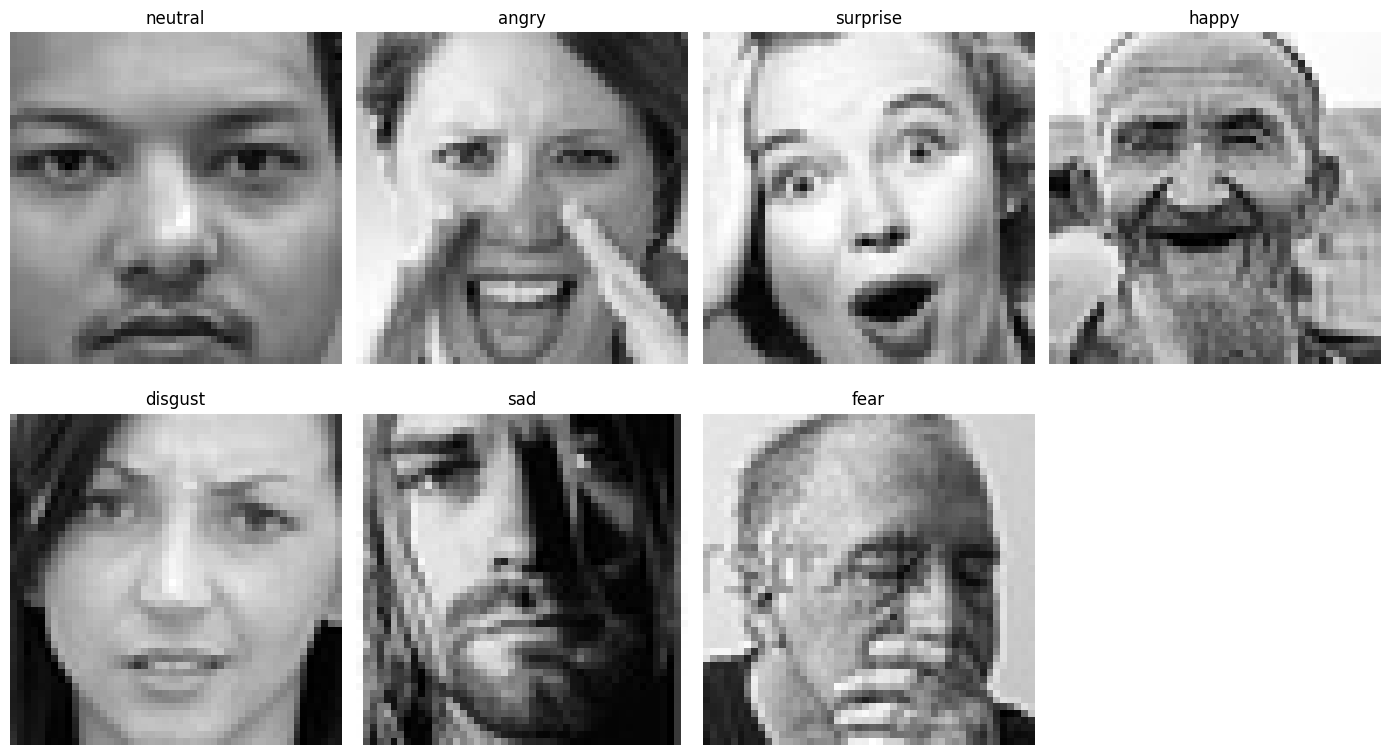

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Show sample images from each class
base_dir = "/content/facial_data/train"
class_names = os.listdir(base_dir)

plt.figure(figsize=(14, 8))
for i, class_name in enumerate(class_names[:7]):
    class_dir = os.path.join(base_dir, class_name)
    image_path = os.path.join(class_dir, os.listdir(class_dir)[0])

    image = plt.imread(image_path)
    plt.subplot(2, 4, i + 1)
    plt.imshow(image, cmap='gray')
    plt.title(class_name)
    plt.axis('off')
plt.tight_layout()
plt.show()


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/facial_data/train"
test_dir = "/content/facial_data/test"

# ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))  # 7 emotion classes


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    epochs=30,
    validation_data=test_generator
)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


449/449 ━━━━━━━━━━━━━━━━━━━━ 44s 74ms/step - accuracy: 0.2419 - loss: 2.5698 - val_accuracy: 0.3514 - val_loss: 1.6680
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.3502 - loss: 1.6428 - val_accuracy: 0.4185 - val_loss: 1.5076
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.3884 - loss: 1.5488 - val_accuracy: 0.4451 - val_loss: 1.4792
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.4142 - loss: 1.5002 - val_accuracy: 0.4804 - val_loss: 1.3756
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.4412 - loss: 1.4489 - val_accuracy: 0.4639 - val_loss: 1.3786
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 23s 51ms/step - accuracy: 0.4551 - loss: 1.4104 - val_accuracy: 0.5103 - val_loss: 1.2630
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.4576 - loss: 1.4004 - val_accuracy: 0.5205 - val_loss: 1.2551
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 22s 50ms/step - accuracy: 0.4786 - loss: 1.3682 - val_accurac

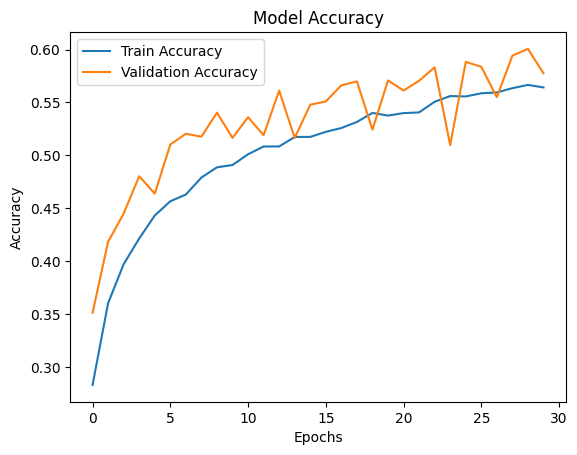

In [24]:
import matplotlib.pyplot as plt

# Accuracy and Loss Curves
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [43]:
model.save("facial_expression_model.h5")


In [44]:
from tensorflow.keras.models import load_model

# Load the pre-trained models
audio_model = load_model('/content/audio_model.h5')
facial_model = load_model("facial_expression_model.h5")


In [46]:
audio_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
facial_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [47]:
import numpy as np

def predict_emotion(audio_input, facial_input):
    # Step 1: Get predictions (probabilities) from both models
    audio_pred = audio_model.predict(np.expand_dims(audio_input, axis=0))[0]  # shape: (7,)
    facial_pred = facial_model.predict(np.expand_dims(facial_input, axis=0))[0]  # shape: (7,)

    # Step 2: Average the predictions
    final_pred = (audio_pred + facial_pred) / 2.0

    # Step 3: Get the final emotion class
    emotion_index = np.argmax(final_pred)

    # Map class index to emotion label
    emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']
    predicted_emotion = emotion_labels[emotion_index]

    return predicted_emotion


In [49]:
import librosa
import numpy as np

def preprocess_audio(file_path):
    y, sr = librosa.load(file_path, duration=3, offset=0.5)  # Load 3 seconds audio
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    mfcc = np.mean(mfcc.T, axis=0)  # Reduce dimensionality (time average)
    return mfcc


In [50]:
import cv2

def preprocess_facial(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Assuming grayscale input
    img = cv2.resize(img, (48, 48))  # Resize to 48x48 if your model trained on that
    img = img.astype("float32") / 255.0
    img = np.expand_dims(img, axis=-1)  # Add channel dimension
    return img


In [ ]:
audio_path = "/content/ravdess/Actor_01/03-01-04-01-02-01-01.wav"
facial_img_path = "/content/facial_data/test/happy/PrivateTest_731447.jpg"  # replace with actual path

# Prepare inputs
processed_audio_input = preprocess_audio(audio_path)
processed_facial_input = preprocess_facial(facial_img_path)

# Predict emotion
final_emotion = predict_emotion(processed_audio_input, processed_facial_input)
print("🎭 Final Predicted Emotion:", final_emotion)
